# Counting particles and Voids

In this notebook is explored how the ratio $N_{\textbf{RP}} : N_{\textbf{OP}}$ affects the void catalog.

All the calculations up to the date where performed on my laptop, the old

In [1]:
%pylab inline

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

Populating the interactive namespace from numpy and matplotlib


In [2]:
! cp ../12_abacus_3N_random_particles/void_masterlist_N30000.cat ./
! cp ../11_abacus_2N_random_particles/void_masterlist_N20000.cat ./
! cp ../10_abacus_N_random_particles/void_masterlist_N10000.cat ./


In [3]:
! ls -lt

total 2880
-rw-rw-r-- 1 filipo filipo  278804 mar  1 01:56 void_masterlist_N10000.cat
-rw-rw-r-- 1 filipo filipo  910622 mar  1 01:56 void_masterlist_N20000.cat
-rw-rw-r-- 1 filipo filipo 1559595 mar  1 01:56 void_masterlist_N30000.cat
-rw-rw-r-- 1 filipo filipo   55299 mar  1 01:56 counting_voids.ipynb
-rw-rw-r-- 1 filipo filipo   11854 mar  1 01:54 volume_function.pdf
-rw-rw-r-- 1 filipo filipo  117913 feb 20 15:48 ol_reliable.jpg


In [4]:
cat_1N = np.loadtxt("void_masterlist_N10000.cat", delimiter=",")
cat_2N = np.loadtxt("void_masterlist_N20000.cat", delimiter=",")
cat_3N = np.loadtxt("void_masterlist_N30000.cat", delimiter=",")

# How many particles have each halo?

In [5]:
n_halos_cat1N = cat_1N[-1,0].astype(int)
n_halos_cat2N = cat_2N[-1,0].astype(int)
n_halos_cat3N = cat_3N[-1,0].astype(int)

N1 = 10000
N2 = 2*N1
N3 = 3*N1


print( n_halos_cat1N, n_halos_cat2N, n_halos_cat3N)


143 165 163


In [6]:
2 * 165 ** (1/3)

10.969613104865235

In [7]:
np.logspace(-4, 0, 11 )  

array([1.00000000e-04, 2.51188643e-04, 6.30957344e-04, 1.58489319e-03,
       3.98107171e-03, 1.00000000e-02, 2.51188643e-02, 6.30957344e-02,
       1.58489319e-01, 3.98107171e-01, 1.00000000e+00])

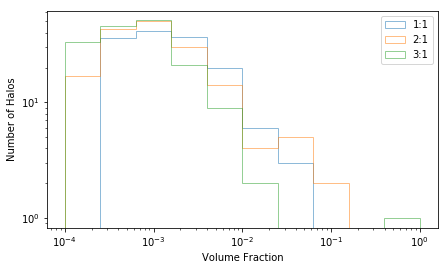

In [9]:
catalogs = [cat_1N, cat_2N, cat_3N]
n_halos_per_catalog = [n_halos_cat1N, n_halos_cat2N, n_halos_cat3N]
label_cat = ["1:1", "2:1", "3:1"]
N = [ N1, N2, N3]

fig = figure(figsize=(7,4))


hists = []


bins = np.logspace(-4, 0, 11 )  
for j in range(len(catalogs)):
    
    
    aux = [] # Counting particles per halo
    
    for i in range(n_halos_per_catalog[j] ):
        
        index = np.where( catalogs[j][:,0] == i)[0]
        aux.append(index.shape[0])
    
    aux = np.array(aux)/N[j]
        

    hists.append(hist(aux, alpha=0.5, label=label_cat[j], bins=bins, histtype="step"))


    plt.ylabel("Number of Halos")
    plt.xlabel("Volume Fraction")
    plt.yscale('log')
    plt.xscale('log')

    plt.legend(loc=1)
    
    plt.savefig("volume_function.pdf", format="pdf")
    

In [16]:
# About the sample
Radius = 100 # Mpc/h
Volume = 4 * pi * Radius**3 /3
print(Volume)

4188790.2047863905


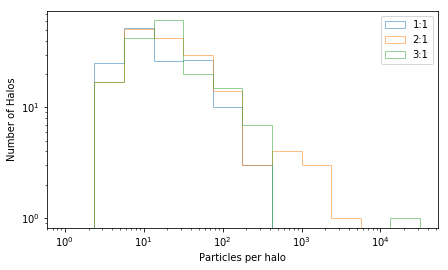

In [30]:
catalogs = [cat_1N, cat_2N, cat_3N]
n_halos_per_catalog = [n_halos_cat1N, n_halos_cat2N, n_halos_cat3N]
label_cat = ["1:1", "2:1", "3:1"]
N = [ N1, N2, N3]

fig = figure(figsize=(7,4))


hists = []


bins = np.logspace( 0, 4.5, 13 )  
for j in range(len(catalogs)):
    
    
    aux = [] # Counting particles per halo
    
    for i in range(n_halos_per_catalog[j] ):
        
        index = np.where( catalogs[j][:,0] == i)[0]
        aux.append(index.shape[0])
    
    aux = np.array(aux) # Raw value of particles per halo.
                
    hists.append( hist(aux, alpha=0.5, label=label_cat[j], bins=bins, histtype="step" ))


    plt.ylabel("Number of Halos")
    plt.xlabel("Particles per halo")
    plt.yscale('log')
    plt.xscale('log')

    plt.legend(loc=1)
    
    plt.savefig("Particle_density_function02.pdf", format="pdf")

In [108]:
histograms = [
hists[0][0],
hists[1][0],
hists[2][0]
]

In [109]:
histograms = np.array(histograms)

In [110]:
center_bins = []
for i in range( len(bins) -1):
    center_bins.append((log10(bins[i+1]) + log10(bins[i]))/2 )

In [111]:
for i in range(3):
    histograms[i, histograms[i,:] == 0 ] = 0.00000001

In [112]:
histograms

array([[1.0e-08, 2.5e+01, 5.2e+01, 2.6e+01, 2.7e+01, 1.0e+01, 3.0e+00,
        1.0e-08, 1.0e-08, 1.0e-08, 1.0e-08, 1.0e-08],
       [1.0e-08, 1.7e+01, 5.1e+01, 4.2e+01, 3.0e+01, 1.4e+01, 3.0e+00,
        4.0e+00, 3.0e+00, 1.0e+00, 1.0e-08, 1.0e-08],
       [1.0e-08, 1.7e+01, 4.2e+01, 6.1e+01, 2.0e+01, 1.5e+01, 7.0e+00,
        1.0e-08, 1.0e-08, 1.0e-08, 1.0e-08, 1.0e+00]])

In [113]:
histograms = histograms/Volume
print(histograms)

[[2.38732415e-15 5.96831037e-06 1.24140856e-05 6.20704278e-06
  6.44577520e-06 2.38732415e-06 7.16197244e-07 2.38732415e-15
  2.38732415e-15 2.38732415e-15 2.38732415e-15 2.38732415e-15]
 [2.38732415e-15 4.05845105e-06 1.21753531e-05 1.00267614e-05
  7.16197244e-06 3.34225380e-06 7.16197244e-07 9.54929659e-07
  7.16197244e-07 2.38732415e-07 2.38732415e-15 2.38732415e-15]
 [2.38732415e-15 4.05845105e-06 1.00267614e-05 1.45626773e-05
  4.77464829e-06 3.58098622e-06 1.67112690e-06 2.38732415e-15
  2.38732415e-15 2.38732415e-15 2.38732415e-15 2.38732415e-07]]


In [114]:
len(center_bins)

12

In [115]:
hist_steps = []

for i in range(3):
    aux = []
    for j in range(len(center_bins)):
        aux.append(histograms[i,j])
        aux.append(histograms[i,j])
    hist_steps.append(aux)

In [116]:
bins_steps = []
for i in range(len(bins)):
    if(i==0):
        bins_steps.append(bins[i])
    elif (i == len(bins)-1):
        bins_steps.append(bins[i])
    else:
        bins_steps.append(bins[i])
        bins_steps.append(bins[i])

In [117]:
len(bins_steps)

24

In [118]:
len(hist_steps[0])

24

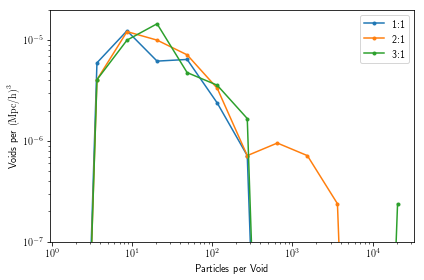

In [127]:
for i in range(3):
    plot( 10**np.array(center_bins), histograms[i],  marker=".", label=label_cat[i])

plt.yscale("log")

plt.xlabel("Particles per Void")
plt.ylabel(r"Voids per $\left( \mathrm{Mpc/h} \right) ^{3}$")

plt.xscale("log")
plt.ylim(0.0000001,0.00002)
plt.legend(loc=1)

plt.tight_layout()

plt.savefig("Particle_density_function_log.pdf", format="pdf")

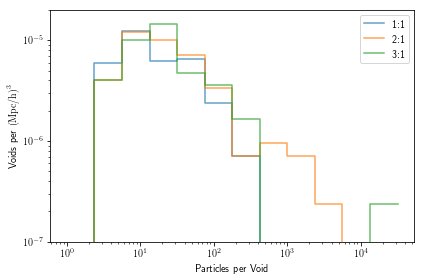

In [122]:


for i in range(3):
    plot( bins_steps, hist_steps[i],  marker="", alpha=0.7, label=label_cat[i])

plt.yscale("log")

plt.xlabel("Particles per Void")
plt.ylabel(r"Voids per $\left( \mathrm{Mpc/h} \right) ^{3}$")

plt.xscale("log")
plt.ylim(0.0000001,0.00002)
plt.legend(loc=1)

plt.tight_layout()

plt.savefig("Particle_density_function_log2.pdf", format="pdf")

In [94]:
hist_steps[0]

[nan,
 nan,
 5.968310365946076e-06,
 5.968310365946076e-06,
 1.2414085561167838e-05,
 1.2414085561167838e-05,
 6.207042780583919e-06,
 6.207042780583919e-06,
 6.445775195221762e-06,
 6.445775195221762e-06,
 2.3873241463784303e-06,
 2.3873241463784303e-06,
 7.161972439135291e-07,
 7.161972439135291e-07,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]